## <font color='blue'>Contents</font>
### <font color='red'> 1. Business Understanding</font>
      The objective and the motive of the project  
      
###  <font color='red'>2. Data acquisition</font>
      Data aquisition  
      Convert data into a Pandas Data Frame
      
### <font color='red'>3. Data Manipulation</font>
      Treating missing values
      Working with outliers

### <font color='red'>4. Exploratory Data Analysis</font>
      Univariate Analysis      
      Bivariate analysis           


 # Data Acquisition

In [48]:
# Required Libraries

import requests
import os
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns 
import matplotlib.pyplot as plt


In [5]:
# Function used to acquire the data from the UCI website

def aquire_data(path_to_data, data_urls):
    if not os.path.exists(path_to_data):
        os.mkdir(path_to_data)
        
    for url in data_urls:
        data = requests.get(url).content
        filename = os.path.join(path_to_data, os.path.basename(url))
        with open(filename, 'wb') as file: 
            file.write(data)

In [6]:
data_urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
             "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
             "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"]

aquire_data('data', data_urls)

## Here 3 sets of datas are available :
### adult.names - corresponds to different columns in the data.
### adult.data - corresponds to the observations in the training data. 
### adult.test - corresponds to the observations in the test data.

In [7]:
column_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", 
                "Martial Status", "Occupation", "Relationship", "Race", "Sex", 
                "Capital-Gain", "Capital-Loss", "Hours-per-week", "Country", "Income"] 

## Converting to Pandas DataFrame

In [8]:
train = pd.read_csv('data/adult.data', names=column_names, sep=' *, *', na_values='?', 
                   engine='python')
test = pd.read_csv('data/adult.test', names=column_names, sep=' *, *', skiprows=1, 
                   engine='python', na_values='?')

In [9]:
train.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [11]:
test.Income.unique() # Unique attributes in the Income column

array(['<=50K.', '>50K.'], dtype=object)

In [12]:
train.Income.unique()

array(['<=50K', '>50K'], dtype=object)

In [13]:
# Removing the "." at the end of the Income column

test.Income = np.where(test.Income == '<=50K.', '<=50K', '>50K')


In [16]:
# # Concatenating train and test.

df= pd.concat((train,test),axis=0)
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.Income.unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
df.shape

(48842, 15)

### Total observations are 48842 with 15 columns

# Data Manipulation

### Dealing and Treating Missing Values

In [19]:
df.isnull().sum()

Age                  0
Workclass         2799
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Country            857
Income               0
dtype: int64

### From the above observation we can find that the WorkClass, Occupation and Country has missing values by 2799,2809 and 857 respectively

### Replacing missing data of categorical columns data with the mode value.
### Replacing missing numerical columns data with the median value or mean.

In [21]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-per-week     int64
Country           object
Income            object
dtype: object

### From the above type checking we can see that those columns that have missing values are all of categorical values.

In [33]:
print('Unique Columns in Country are : \n',df['Country'].unique())
print('\n\nUnique Columns in Workclass are : \n',df['Workclass'].unique())
print('\n\nUnique Columns in Occupation are : \n',df['Occupation'].unique())

Unique Columns in Country are : 
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


Unique Columns in Workclass are : 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']


Unique Columns in Occupation are : 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [34]:
print('The Number of unique values in the column Country are : ',len(df['Country'].unique()))
print('The Number of unique values in the column Workclass are : ',len(df['Workclass'].unique()))
print('The Number of unique values in the column Occupation are : ',len(df['Occupation'].unique()))

The Number of unique values in the column Country are :  42
The Number of unique values in the column Workclass are :  9
The Number of unique values in the column Occupation are :  15


### Missing value replacement

In [37]:
# Creating a helper function using the statistics library

def fill_categorical_missing(data, column):
    data.loc[data[column].isnull(), column] = stat.mode(data[column])

cols_to_fill = ['Workclass', 'Occupation', 'Country']

for col in cols_to_fill:
    fill_categorical_missing(df, col)

In [42]:
print(df.isnull().sum())

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-per-week    0
Country           0
Income            0
dtype: int64


In [45]:
### All the null/missing values have been eliminated using statistics
### Now Checking for outliers
df_cp = df.copy() ## Creating a copy for the outliers analysis 
df_cp.head()



,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df_cp.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## We can see that 6 columns have numerical values.

## With the quantiles, min and max, the dataset can be splitted into 4 buckets:

### Bucket 1: below 25% (e.g) for Age column, 25% of people are under 28 years old
### Bucket 2: between 25% and 50% (e.g), 25% of them (50%-25%) are between 28 and 37 years old.
### Bucket 3: between 50% and 75% (e.g), 25% of them are between 37 and 48 years old .
### Bucket 4: between above 75% (e.g), 25% of them are over 48 years old.

### Then all the values beyond 1.5xIQR are considered as outliers. IQR = Inter Quartile Range = 75th - 25th.

## Boxplots can be used to analyse outliers

## <font color='#fc6703'>AGE</font>


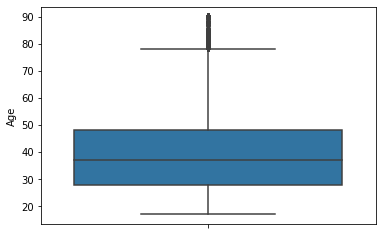

In [49]:
sns.boxplot(y='Age', data=df_cp)
plt.show()

In [50]:
# Creating a 0-100th percentile to find a correct percenmtile value for removal of the outliers

def ten_to_ten_percentiles(data, column):
    for i in range(0,100,10):
        var = data[column].values
        var = np.sort(var, axis=None)
        print('{} percentile value is {}'.format(i, var[int(len(var) * (float(i)/100))]))
    print('100 percentile value is {}'.format(var[-1]))

In [51]:
#Percentileson Age
ten_to_ten_percentiles(df_cp, 'Age')


0 percentile value is 17
10 percentile value is 22
20 percentile value is 26
30 percentile value is 30
40 percentile value is 33
50 percentile value is 37
60 percentile value is 41
70 percentile value is 45
80 percentile value is 51
90 percentile value is 58
100 percentile value is 90


In [52]:
# From above we get to know that there are no extreme values in 0-100th percentiles of Age

# Now calculating column values at each percntile 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100
def percentiles_from_90(data, column):
    for i in range(90,100):
        var = data[column].values
        var = np.sort(var, axis=None)
        print('{} percentile value is {}'.format(i, var[int(len(var) * (float(i)/100))]))
    print('100 percentile value is {}'.format(var[-1]))


In [53]:
percentiles_from_90(df_cp,'Age')

90 percentile value is 58
91 percentile value is 59
92 percentile value is 60
93 percentile value is 61
94 percentile value is 62
95 percentile value is 63
96 percentile value is 65
97 percentile value is 67
98 percentile value is 70
99 percentile value is 74
100 percentile value is 90


 The percentiles from 90-100 alsop shows that there are no extreme values
 Going deeper with the percentile values, we can have more information.
 So creating a function to check deeper in to 99-100th percentiles

In [54]:
# Calculating colunm values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100


def percentiles_from_99(data, column):
    for i in np.arange(0.0, 1.0, 0.1):
        var =data[column].values
        var = np.sort(var,axis = None)
        print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ",var[-1])
    
percentiles_from_99(df_cp,'Age')

99.0 percentile value is 74
99.1 percentile value is 75
99.2 percentile value is 75
99.3 percentile value is 76
99.4 percentile value is 77
99.5 percentile value is 78
99.6 percentile value is 79
99.7 percentile value is 81
99.8 percentile value is 82
99.9 percentile value is 90
100 percentile value is  90


## <font color='#fc6703'>Education-Num</font>


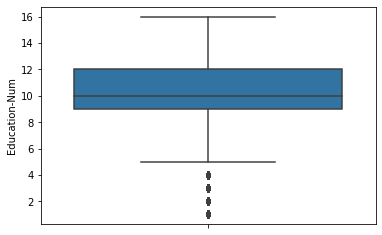

In [55]:
sns.boxplot(y='Education-Num', data=df_cp)
plt.show()

In [68]:
print('0-100th',ten_to_ten_percentiles(df_cp, 'Education-Num'))
print('\n\n90-100th',percentiles_from_90(df_cp,'Education-Num'))
print('\n99-100th',percentiles_from_99(df_cp,'Education-Num'))

0 percentile value is 1
10 percentile value is 7
20 percentile value is 9
30 percentile value is 9
40 percentile value is 9
50 percentile value is 10
60 percentile value is 10
70 percentile value is 11
80 percentile value is 13
90 percentile value is 13
100 percentile value is 16
0-100th None
90 percentile value is 13
91 percentile value is 13
92 percentile value is 14
93 percentile value is 14
94 percentile value is 14
95 percentile value is 14
96 percentile value is 14
97 percentile value is 14
98 percentile value is 15
99 percentile value is 16
100 percentile value is 16


90-100th None
99.0 percentile value is 16
99.1 percentile value is 16
99.2 percentile value is 16
99.3 percentile value is 16
99.4 percentile value is 16
99.5 percentile value is 16
99.6 percentile value is 16
99.7 percentile value is 16
99.8 percentile value is 16
99.9 percentile value is 16
100 percentile value is  16

99-100th None


### Hence there is no anomalies with Education number.



## <font color='#fc6703'>Capital-Gain</font>


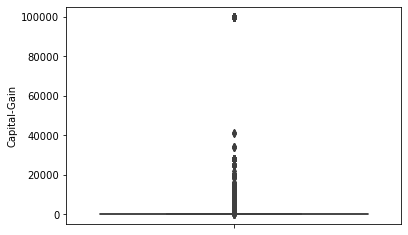

In [69]:
# Capital-Gain
sns.boxplot(y='Capital-Gain', data=df_cp)
plt.show()

In [70]:
print('0-100th',ten_to_ten_percentiles(df_cp, 'Capital-Gain'))
print('\n\n90-100th',percentiles_from_90(df_cp,'Capital-Gain'))
print('\n99-100th',percentiles_from_99(df_cp,'Capital-Gain'))

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is 99999
0-100th None
90 percentile value is 0
91 percentile value is 0
92 percentile value is 1151
93 percentile value is 2829
94 percentile value is 3674
95 percentile value is 5013
96 percentile value is 7298
97 percentile value is 7688
98 percentile value is 14084
99 percentile value is 15024
100 percentile value is 99999


90-100th None
99.0 percentile value is 15024
99.1 percentile value is 15024
99.2 percentile value is 15831
99.3 percentile value is 20051
99.4 percentile value is 27828
99.5 percentile value is 41310
99.6 percentile value is 99999
99.7 percentile value is 99999
99.8 percentile value is 99999
99.9 percentile value is 99999
100 percentile value is  99999

99-100th None


In [73]:
# Removing the outliers based on 99.5th percentile of Capital-Gain
df_cp = df_cp[df_cp['Capital-Gain']<=34095]

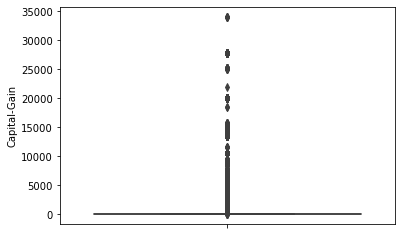

In [74]:
sns.boxplot(y='Capital-Gain', data=df_cp)
plt.show()

## <font color='#fc6703'>Capital-Loss</font>


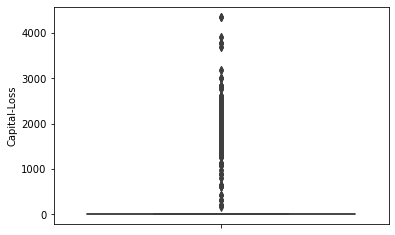

In [72]:
# Capital-Loss
sns.boxplot(y='Capital-Loss', data=df_cp)
plt.show()

In [71]:
print('0-100th',ten_to_ten_percentiles(df_cp, 'Capital-Loss'))
print('\n\n90-100th',percentiles_from_90(df_cp,'Capital-Loss'))
print('\n99-100th',percentiles_from_99(df_cp,'Capital-Loss'))

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is 4356
0-100th None
90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 1590
97 percentile value is 1848
98 percentile value is 1902
99 percentile value is 2001
100 percentile value is 4356


90-100th None
99.0 percentile value is 2001
99.1 percentile value is 2002
99.2 percentile value is 2051
99.3 percentile value is 2174
99.4 percentile value is 2231
99.5 percentile value is 2258
99.6 percentile value is 2377
99.7 percentile value is 2415
99.8 percentile value is 2415
99.9 percentile value is 2559
100 percentile value is  4356

99-100th None


## <font color='#fc6703'>Hours-per-week</font>


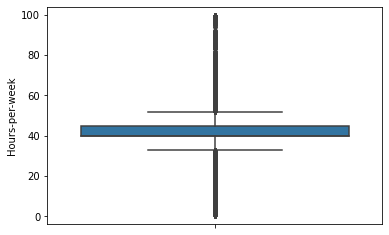

In [75]:

sns.boxplot(y='Hours-per-week', data=df_cp)
plt.show()

In [76]:
print('0-100th',ten_to_ten_percentiles(df_cp, 'Hours-per-week'))
print('\n\n90-100th',percentiles_from_90(df_cp,'Hours-per-week'))
print('\n99-100th',percentiles_from_99(df_cp,'Hours-per-week'))

0 percentile value is 1
10 percentile value is 24
20 percentile value is 35
30 percentile value is 40
40 percentile value is 40
50 percentile value is 40
60 percentile value is 40
70 percentile value is 40
80 percentile value is 48
90 percentile value is 55
100 percentile value is 99
0-100th None
90 percentile value is 55
91 percentile value is 55
92 percentile value is 56
93 percentile value is 60
94 percentile value is 60
95 percentile value is 60
96 percentile value is 60
97 percentile value is 65
98 percentile value is 70
99 percentile value is 80
100 percentile value is 99


90-100th None
99.0 percentile value is 80
99.1 percentile value is 80
99.2 percentile value is 80
99.3 percentile value is 80
99.4 percentile value is 84
99.5 percentile value is 84
99.6 percentile value is 90
99.7 percentile value is 98
99.8 percentile value is 99
99.9 percentile value is 99
100 percentile value is  99

99-100th None


### There is no special extreme value here.

### Now, we are going to create a helper function in order to remove all the outliers, based in our previous univariate analysis.

In [77]:
def remove_outliers(data):
    a = data.shape[0]
    print("Number of salary records = {}".format(a))
        
    temp_data = data[data['Capital-Gain']<=34095]
    b = temp_data.shape[0]
    
    print('Number of outliers from the Capital-Gain column= {}'.format(a - b))
        
    data = data[(data['Capital-Gain']<=34095)]
    
    print('Total outlies removed = {}'.format(a-b))
    print('-----'*10)
    return data

In [78]:
print('Removing all the outliers from the data')
print('-----'*10)
df_no_outliers = remove_outliers(df)

proportion_remaing_data = float(len(df_no_outliers)) / len(df)
print('Proportion of observation that remain after removing outliers = {}'.format(proportion_remaing_data))

Removing all the outliers from the data
--------------------------------------------------
Number of salary records = 48842
Number of outliers from the Capital-Gain column= 247
Total outlies removed = 247
--------------------------------------------------
Proportion of observation that remain after removing outliers = 0.9949428770320625


## After removing the outliers from out data, still 99.49% of the dataset remain present.



# Exploratory Data Analysis

In [79]:
df_no_outliers.Income.unique()

array(['<=50K', '>50K'], dtype=object)

<AxesSubplot:xlabel='Income', ylabel='count'>

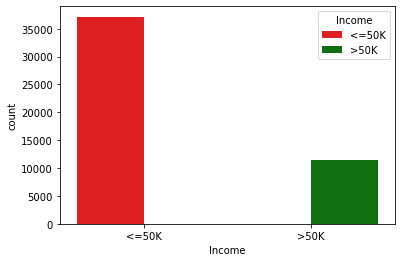

In [80]:
palette = {"<=50K":"r", ">50K":"g"}
sns.countplot(x="Income", data=df_no_outliers, hue="Income", palette=palette)